In [1]:

import sys
sys.path.append('..')

from olfactory_navigation import Environment
from olfactory_navigation.agents import QAgent, QMemAgent, DQNAgent
from olfactory_navigation.simulation import run_test
from olfactory_navigation.test_setups import run_all_starts_test

from matplotlib import pyplot as plt
#%matplotlib inline

import pandas as pd
import numpy as np
import cupy as cp




/home/rando/anaconda3/envs/olfactory_navigation/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


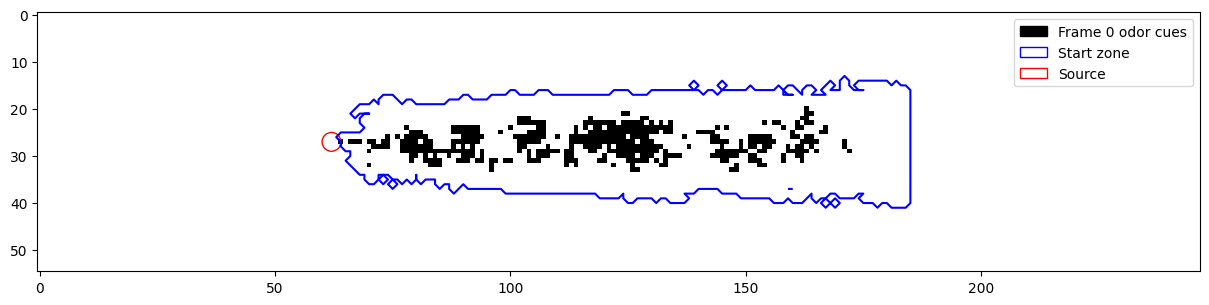

In [2]:
env = Environment(data_file="/storage/rando/data/nose_data_27_123.npy",
                  data_source_position=[13, 0],
                  source_radius=2,
                  margins=[14, 62],
                  boundary_condition='wrap_vertical',
                  start_zone='odor_present',
                  odor_present_threshold=3e-6)

env.plot()

In [3]:
env.source_position

array([27, 62])

In [4]:
# IT WORKS !
# horizon = 1000
# num_episodes = 100000
# eps_decay = 10000
# ag = QAgent(
#     environment=env,
#     horizon=horizon, 
#     eps_init=1.0,
#     eps_end=1e-5,
#     eps_decay=eps_decay,#int(num_episodes - num_episodes//10),
#     learning_rate=lambda t : (0.6 - 0.001) * np.exp(- t / eps_decay),
#     gamma=1.0,
#     delta=500,
#     rewards=(1.0, -0.001),
#     num_episodes=num_episodes,
#     deterministic=True,
#     checkpoint_folder  = "./q_agent_training/checkpoints",
#     checkpoint_frequency  = 10000
# )


horizon = 1000
num_episodes = 500000
eps_decay = 50000
batch_size = 64
ag = DQNAgent(
    environment=env,
    horizon=horizon, 
    memory_size=5,
    eps_init=1.0,
    eps_end=1e-5,
    eps_decay=eps_decay,#int(num_episodes - num_episodes//10),
    learning_rate=1e-4,
    tau = 0.005,
    batch_size=batch_size,
    gamma=1.0,
    delta=500,
    rewards=(1.0, -0.001),
    num_episodes=num_episodes,
    checkpoint_folder  = "./dqn_agent_training/memory_size_5/checkpoints",
    checkpoint_frequency  = 10000
)







In [5]:
# ag.save("./q_agent_training")

In [6]:
#ag.load("./q_agent_training/memory_size_20/decay_10000")

In [7]:
training_result = ag.train()

  0%|          | 0/500000 [00:00<?, ?it/s]


tensor([0, 0, 0, 0, 0, 0])


NameError: name 'exit' is not defined

In [ ]:
#fig, ax = plt.subplots()
#ax.plot(range(len(training_result['average_cumulative_reward'])), training_result['average_cumulative_reward'], '-')
#fig.savefig("./q_agent_training_2/avg_crew.pdf")

In [ ]:
# fig, ax = plt.subplots()

# ax.imshow((training_result['best_Q'].T[:, :20] - training_result['best_Q'].T[:, :20].min(axis=0)) / (training_result['best_Q'].T[:, :20].max(axis=0) - training_result['best_Q'].T[:, :20].min(axis=0)), origin='lower' )


# ax.set_xticks(range(20))
# ax.set_yticks(range(4))


In [ ]:
hist = run_test(n=10000, agent=ag, use_gpu=False, horizon=horizon, reward_discount=0.9999)

100%|██████████| 1000/1000 [00:06<00:00, 144.53it/s, done =3241 of 10000 (32.4%)]


Simulations done in 6.921s:
Simulations reached goal: 3241/10000 (6759 failures) (32.41%)
	- Average step count: 704.964 +- 429.72 (Successfull only: 89.675 +- 98.21)
	- Extra steps: 633.510 +- 424.66 (Successful only: 25.623 +- 86.65)
	- Average discounted rewards (ADR): 0.933 +- 0.04 (Successfull only: 0.991 +- 0.01)
	- Tmin/T: 0.326 +- 0.38 (Successful only: 0.848 +- 0.21)


In [ ]:
#hist.plot(500)

In [ ]:
for i in [0, 10, 50, 100, 500, 1000, 1500, 2000]:
    print("Time shift = {}".format(i))
    run_all_starts_test(ag, time_loop=True, horizon=horizon, reward_discount=1.0, time_shift=i)

Time shift = 0


100%|██████████| 1000/1000 [00:01<00:00, 646.31it/s, done =1093 of 2393 (45.7%)]


Simulations done in 1.549s:
Simulations reached goal: 1093/2393 (1300 failures) (45.67%)
	- Average step count: 582.152 +- 457.10 (Successfull only: 85.169 +- 52.85)
	- Extra steps: 511.119 +- 449.88 (Successful only: 21.657 +- 29.42)
	- Average discounted rewards (ADR): 1.000 +- 0.00 (Successfull only: 1.000 +- 0.00)
	- Tmin/T: 0.409 +- 0.39 (Successful only: 0.803 +- 0.23)
Time shift = 10


100%|██████████| 1000/1000 [00:01<00:00, 614.25it/s, done =1095 of 2393 (45.8%)]


Simulations done in 1.630s:
Simulations reached goal: 1095/2393 (1298 failures) (45.76%)
	- Average step count: 580.784 +- 457.80 (Successfull only: 83.849 +- 52.50)
	- Extra steps: 509.750 +- 449.39 (Successful only: 21.538 +- 28.01)
	- Average discounted rewards (ADR): 1.000 +- 0.00 (Successfull only: 1.000 +- 0.00)
	- Tmin/T: 0.408 +- 0.39 (Successful only: 0.798 +- 0.23)
Time shift = 50


100%|██████████| 1000/1000 [00:01<00:00, 585.87it/s, done =1177 of 2393 (49.2%)]


Simulations done in 1.708s:
Simulations reached goal: 1177/2393 (1216 failures) (49.19%)
	- Average step count: 549.369 +- 459.44 (Successfull only: 83.807 +- 51.22)
	- Extra steps: 478.336 +- 451.39 (Successful only: 20.459 +- 26.77)
	- Average discounted rewards (ADR): 1.000 +- 0.00 (Successfull only: 1.000 +- 0.00)
	- Tmin/T: 0.434 +- 0.40 (Successful only: 0.801 +- 0.24)
Time shift = 100


100%|██████████| 1000/1000 [00:01<00:00, 690.49it/s, done =1188 of 2393 (49.6%)]


Simulations done in 1.450s:
Simulations reached goal: 1188/2393 (1205 failures) (49.64%)
	- Average step count: 542.545 +- 461.82 (Successfull only: 78.543 +- 45.29)
	- Extra steps: 471.511 +- 452.92 (Successful only: 16.233 +- 25.79)
	- Average discounted rewards (ADR): 1.000 +- 0.00 (Successfull only: 1.000 +- 0.00)
	- Tmin/T: 0.444 +- 0.41 (Successful only: 0.814 +- 0.25)
Time shift = 500


100%|██████████| 1000/1000 [00:01<00:00, 608.50it/s, done =961 of 2393 (40.2%)]


Simulations done in 1.645s:
Simulations reached goal: 961/2393 (1432 failures) (40.16%)
	- Average step count: 627.205 +- 455.79 (Successfull only: 71.698 +- 40.49)
	- Extra steps: 556.172 +- 447.45 (Successful only: 10.927 +- 18.54)
	- Average discounted rewards (ADR): 1.000 +- 0.00 (Successfull only: 1.000 +- 0.00)
	- Tmin/T: 0.390 +- 0.41 (Successful only: 0.855 +- 0.24)
Time shift = 1000


100%|██████████| 1000/1000 [00:01<00:00, 683.96it/s, done =1144 of 2393 (47.8%)]


Simulations done in 1.464s:
Simulations reached goal: 1144/2393 (1249 failures) (47.81%)
	- Average step count: 559.003 +- 461.54 (Successfull only: 77.529 +- 38.02)
	- Extra steps: 487.969 +- 454.08 (Successful only: 14.377 +- 19.09)
	- Average discounted rewards (ADR): 1.000 +- 0.00 (Successfull only: 1.000 +- 0.00)
	- Tmin/T: 0.438 +- 0.41 (Successful only: 0.831 +- 0.23)
Time shift = 1500


100%|██████████| 1000/1000 [00:01<00:00, 689.86it/s, done =1215 of 2393 (50.8%)]


Simulations done in 1.453s:
Simulations reached goal: 1215/2393 (1178 failures) (50.77%)
	- Average step count: 533.107 +- 460.78 (Successfull only: 80.431 +- 43.75)
	- Extra steps: 462.073 +- 452.81 (Successful only: 16.968 +- 22.43)
	- Average discounted rewards (ADR): 1.000 +- 0.00 (Successfull only: 1.000 +- 0.00)
	- Tmin/T: 0.451 +- 0.41 (Successful only: 0.812 +- 0.24)
Time shift = 2000


100%|██████████| 1000/1000 [00:01<00:00, 679.96it/s, done =997 of 2393 (41.7%)]


Simulations done in 1.473s:
Simulations reached goal: 997/2393 (1396 failures) (41.66%)
	- Average step count: 615.994 +- 455.31 (Successfull only: 78.309 +- 44.82)
	- Extra steps: 544.961 +- 447.13 (Successful only: 16.841 +- 21.92)
	- Average discounted rewards (ADR): 1.000 +- 0.00 (Successfull only: 1.000 +- 0.00)
	- Tmin/T: 0.382 +- 0.40 (Successful only: 0.807 +- 0.26)


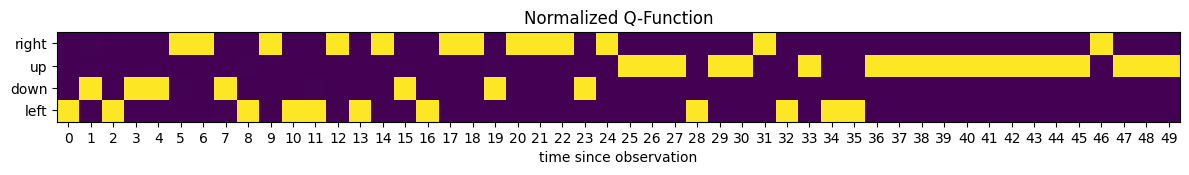

In [ ]:
nQ = ag.Q.T[:, :50]

nQ = (nQ - nQ.min(0)) / (nQ.max(0) - nQ.min(0))


fig, ax = plt.subplots(figsize=(12, 8))
ax.set_title("Normalized Q-Function")
ax.imshow(nQ, origin='lower')

_ = ax.set_xticks(range(nQ.shape[1]))
_ = ax.set_yticks(range(4), ['left', 'down', 'up', 'right'])
ax.set_xlabel("time since observation")

fig.tight_layout()

#fig.savefig("qfun_first_100.pdf", bbox_inches='tight')



In [ ]:
nQ

array([[1.00000000e+00, 1.41489163e-05, 1.00000000e+00, 8.19823023e-04,
        4.17058973e-08, 0.00000000e+00, 3.06199124e-08, 5.40623808e-03,
        1.00000000e+00, 0.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 1.34820685e-03,
        1.00000000e+00, 0.00000000e+00, 1.42470540e-03, 6.91213574e-04,
        2.81702416e-05, 6.47002661e-04, 1.68316271e-03, 1.74685805e-03,
        7.94713284e-05, 0.00000000e+00, 1.33396281e-05, 2.19718945e-06,
        1.00000000e+00, 3.22269395e-05, 1.45019602e-05, 2.98273396e-08,
        1.00000000e+00, 2.27712594e-05, 1.00000000e+00, 1.00000000e+00,
        2.86456520e-05, 3.94827676e-08, 0.00000000e+00, 1.01702666e-05,
        9.97373498e-06, 1.08757331e-06, 6.14646604e-09, 0.00000000e+00,
        6.23164353e-07, 1.13261963e-06, 1.35995595e-06, 3.23156730e-06,
        1.05106159e-06, 2.75709449e-06],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        1.00000000e+00,